In [ ]:
#simple customer care bot
responses = {
      "hi": "Hello! Welcome to TechGadget Support. How can I assist you today?",
      "do you have smartwatches": "Yes, we have a variety of smartwatches. You can check them out on our products page.",
      "shipping time": "Shipping usually takes 3-5 business days.",
      "shipping methods": "We offer standard, expedited, and overnight shipping.",
      "return policy": "You can return products within 30 days of receipt for a full refund.",
      "how to return": "To return a product, please visit our returns page for a step-by-step guide.",
      "won't turn on": "Make sure your gadget is charged. If it still won't turn on, you can visit our troubleshooting page.",
      "reset device": "To reset your device, hold down the power button for 10 seconds. If that doesn't work, please check the manual for a factory reset.",
      "bye": "Thank you for visiting TechGadget. If you have more questions, feel free to ask. Goodbye!"
}

def get_bot_response(user_input):
      user_input = user_input.lower()

      for keyword, response in responses.items():
          if keyword in user_input:
              return response

      return "I'm not sure how to respond to that. Can you try asking something else?"

while True:
      user_input = input("You: ")
      if user_input.lower() in ["quit", "exit", "bye"]:
          print("Bot: Goodbye! If you have any more questions, we're here to help.")
          break

      response = get_bot_response(user_input)
      print(f"Bot: {response}")

In this exercise, you will complete two machine learning tasks using the Jupyter Notebook below.

Supervised learning
Unsupervised learning
You'll generate synthetic data for both exercises and execute them in the Jupyter Notebook. Copy the code below on this page and paste it into a notebook cell, then run the cell.

Part 1: Predicting Building Energy Efficiency (Supervised Learning)
Scenario - You are working for an architecture firm, and your task is to build a model that predicts the energy efficiency rating of buildings based on features like wall area, roof area, overall height, etc.

Supervised Learning Code: To predict the energy efficiency of buildings.

Note - These exercises use synthetic data for simplicity and demonstration purposes. In real-world applications, actual data and more complex models might be used. The choice of algorithms - RandomForestRegressor for supervised learning and KMeans for unsupervised learning - is based on their general applicability and ease of understanding for educational purposes.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

Part 2: Vehicle Clustering (Unsupervised Learning)
Scenario - You are working for an automotive company, and your task is to cluster vehicles into groups based on their features such as weight, engine size, and horsepower.

Unsupervised Learning Code: To cluster vehicles based on their specifications.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

# No labels are needed for unsupervised learning
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()

Building a Decision Tree to Predict Customer Churn
Imagine you are a data analyst at a telecom company. The marketing department has noticed an increase in customer churn and needs your help to identify which customers are most likely to leave next month.

Your Tasks
In this exercise, you will build a decision tree model to predict customer churn for a telecom company. Customer churn refers to when a customer stops doing business with a company. Predicting churn is crucial for businesses to retain customers by addressing their issues proactively.

Copy the code below on this page and paste it into a notebook cell in the Jupyter Notebook below, then run the cell
Dataset Description
We will use a synthetic dataset for this exercise. The dataset contains the following columns:

CustomerID: A unique identifier for each customer.
Age: The age of the customer.
MonthlyCharge: The monthly bill amount for the customer.
CustomerServiceCalls: The number of times the customer contacted customer service.
Churn: This is our target variable, indicating whether the customer churned (Yes) or not (No).
Step-by-Step Instructions
Setup the Environment:
Import necessary libraries: Pandas for data manipulation, Scikit-learn for machine learning, and Matplotlib for visualization.
Create the Dataset:
Use Python to create a synthetic dataset. We'll make a small dataset for simplicity.
Data Preparation:
Split the data into features (X) and the target variable (y).
Further split the dataset into training and testing sets.
Build the Decision Tree Model:
Use Scikit-learn to create a DecisionTreeClassifier.
Train the model on the training data.
Evaluate the Model:
Make predictions on the test set.
Calculate the accuracy of the model.
Visualize the Decision Tree:
Use Matplotlib to visualize how the decision tree makes decisions.
Discuss the Results:
Interpret the decision tree.
Discuss how it can be used by the company to reduce customer churn.
Python Code Implementation

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')

# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
      'CustomerID': range(1, 101),  # Unique ID for each customer
      'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
      'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
      'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
      'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

When you visualize a decision tree, especially one created using Scikit-learn's DecisionTreeClassifier, you'll notice several terms on each node of the tree. Understanding these terms is crucial for interpreting the tree's decision-making process. Let's break down each of these terms:

Gini
The Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
The Gini impurity ranges from 0 to 0.5, where 0 indicates that all elements in the subset belong to the same class (perfect purity), and 0.5 means the data is randomly distributed across various classes.
In decision trees, a lower Gini impurity is generally preferred as it indicates greater purity of the node.
Samples
This value represents the number of samples (or records) that reach the node.
It gives an idea of how much of the training data is affected by the conditions leading to this node.
A high number of samples in a node means that the condition or rule associated with that node is relevant for a significant portion of the dataset.
Value
This shows the distribution of the samples in different classes at that particular node.
For a binary classification problem (like churn prediction with 'Yes' or 'No'), the value is presented as a list of two numbers. The first number indicates the count of samples in the first class, and the second number indicates the count of samples in the second class.
This distribution helps in understanding which class is predominant at a particular node.
Class
This indicates the class that would be predicted if the decision tree traversal ends at that node.
It is determined based on the majority class of the samples that reach the node. For instance, if most samples at a node belong to the 'No Churn' class, the node will predict 'No Churn'.
Feature Name (e.g., 'Monthly Charge')
This is not a standard part of the decision tree node description, but it may appear in the tree's branches.
It represents the feature (or attribute) used to split the data at that node.
For example, if you see "MonthlyCharge <= 80", it means that the tree is splitting the data at this node based on whether the monthly charge is less than or equal to 80.
Understanding these components is essential for interpreting how the decision tree makes its predictions and which features are influential in the decision-making process. This can provide valuable insights, especially in business contexts like customer churn prediction.

Remember to delete the notebook instance after reviewing the solution.


This exercise covered several key terms and concepts related to machine learning, particularly focusing on the process of training and testing a decision tree model.

Key Concepts
Splitting the Dataset - The dataset is divided into training and testing sets. Typically, 70% of the data is used for training the model, and the remaining 30% is reserved for testing.

Training Data vs. Testing Data - Training data is used to train the machine learning model. In contrast, testing data, which the model has not seen during training, is used to evaluate the model's performance and generalization ability.

Model Training Process - The process involves using a 'fit' method where the model is trained using features (X_train) and targets (Y_train). The testing data is not used in this stage.

Prediction and Accuracy Assessment - After training, the model makes predictions on the test data (X_test). These predictions are then compared with the actual outcomes (Y_test) to calculate the model's accuracy.



For this exercise, you will create a simple neural network example. We'll use a synthetic dataset to predict whether a customer will make a purchase based on two features:

Website visit duration
Number of pages visited.
This is a binary classification problem, and we'll use a small neural network for quick execution. Copy and paste the code into the Jupyter Notebook below. Place each step of code into it's own cell, then execute each cell in order.

In [20]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [21]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5330 - loss: 0.6840  
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5513 - loss: 0.6705 
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.6609 
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6225 - loss: 0.6642 
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6607 - loss: 0.6561 
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7112 - loss: 0.6462 
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - loss: 0.6383 
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.6340 
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.6330 
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 0.6250 


In [23]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8042 - loss: 0.6042 
Test Accuracy: 0.800000011920929


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7601 - loss: 0.6174 - val_accuracy: 0.8125 - val_loss: 0.6048
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7545 - loss: 0.6139 - val_accuracy: 0.8125 - val_loss: 0.5994
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7509 - loss: 0.6151 - val_accuracy: 0.8125 - val_loss: 0.5940
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8213 - loss: 0.6084 - val_accuracy: 0.8125 - val_loss: 0.5885
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8423 - loss: 0.6018 - val_accuracy: 0.8125 - val_loss: 0.5828
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9027 - loss: 0.6075 - val_accuracy: 0.8438 - val_loss: 0.5776
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9247 - loss: 0.5921 - val_accuracy: 0.8438 - val_loss: 0.5722
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9299 - loss: 0.5756 - val_accuracy: 0.8438 - val_los

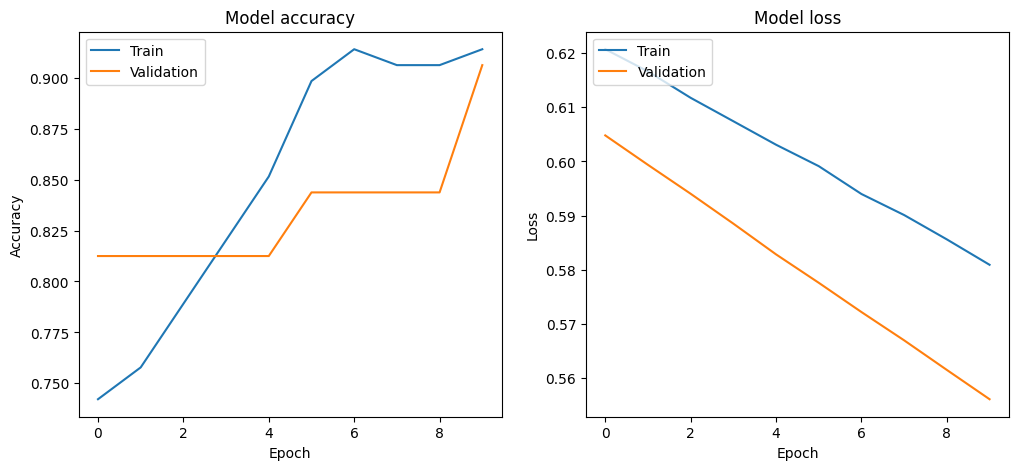

In [24]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


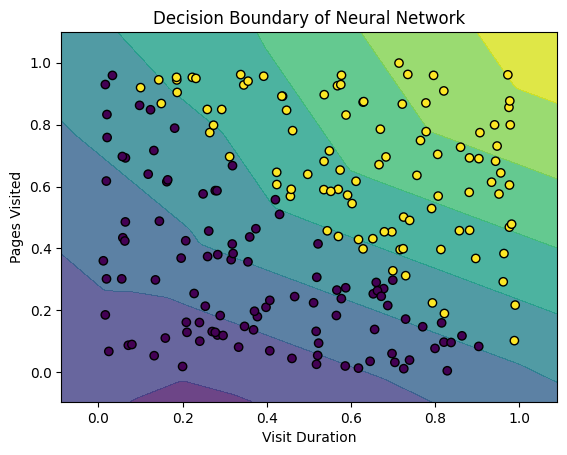

In [25]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()